---

### Universidad de Costa Rica
#### IE0405 - Modelos Probabilísticos de Señales y Sistemas

---

# 6 - Momentos de variables aleatorias

> El valor esperado y los "momentos" (su generalización) permiten caracterizar numéricamente el comportamiento o las tendencias de una variable aleatoria.

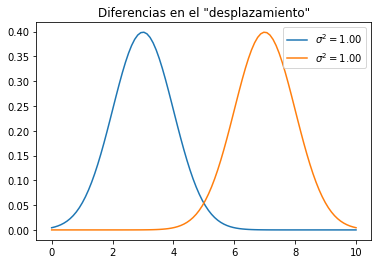

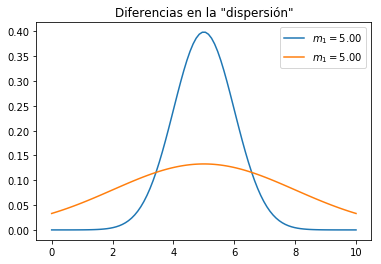

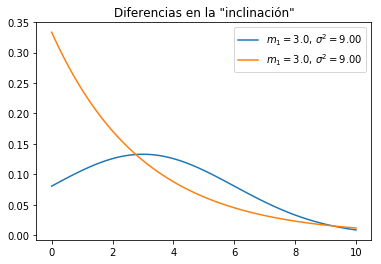

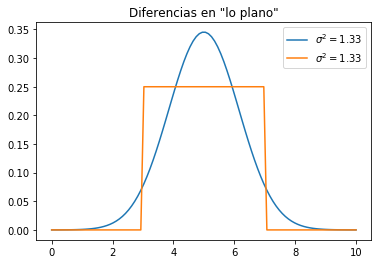

In [45]:
import numpy as np
from scipy.stats import norm, rayleigh, uniform, expon
import matplotlib.pyplot as plt

# Soporte en X
x = np.linspace(0, 10, 100)

# Diferencias en el "desplazamiento"
va1 = norm(3, 1)
va2 = norm(7, 1)
plt.plot(x, va1.pdf(x), label='$\sigma^2 = {:0.2f}$'.format(va1.var()))
plt.plot(x, va2.pdf(x), label='$\sigma^2 = {:0.2f}$'.format(va2.var()))
plt.title('Diferencias en el "desplazamiento"')
plt.legend()
plt.show()

# Diferencias en la "dispersión"
va1 = norm(5, 1)
va2 = norm(5, 3)
plt.plot(x, va1.pdf(x), label='$m_1 = {:0.2f}$'.format(va1.mean()))
plt.plot(x, va2.pdf(x), label='$m_1 = {:0.2f}$'.format(va2.mean()))
plt.title('Diferencias en la "dispersión"')
plt.legend()
plt.show()

# Diferencias en la "inclinación"
va1 = norm(3, 3)
va2 = expon(0, 3)
plt.plot(x, va1.pdf(x), label='$m_1 = {}$, $\sigma^2 = {:0.2f}$'.format(va1.mean(), va1.var()))
plt.plot(x, va2.pdf(x), label='$m_1 = {}$, $\sigma^2 = {:0.2f}$'.format(va2.mean(), va2.var()))
plt.title('Diferencias en la "inclinación"')
plt.legend()
plt.show()

# Diferencias en "lo plano"
va1 = norm(5, np.sqrt(4/3))
va2 = uniform(3, 4)
plt.plot(x, va1.pdf(x), label='$\sigma^2 = {:0.2f}$'.format(va1.var()))
plt.plot(x, va2.pdf(x), label='$\sigma^2 = {:0.2f}$'.format(va2.var()))
plt.title('Diferencias en "lo plano"')
plt.legend()
plt.show()

## 6.1 - Valor esperado de una variable aleatoria, $E[X]$

> El valor esperado de una variable aleatoria es uno de los resultados más importantes y más frecuentemente utilizados. Ya lo conocíamos en su forma discreta como "promedio".

### Valor esperado de una variable aleatoria *continua*

El valor esperado de cualquier variable aleatoria $X$ es

\begin{equation}
E[X] = \int_{-\infty}^{\infty}x~f_{X}(x) ~ \mathrm{d} x \triangleq \overline{X}
\end{equation}

In [ ]:
import numpy as np
from scipy import stats
from scipy.integrate import quad, trapz
import matplotlib.pyplot as plt

# Crear objeto aleatorio Rayleigh
va = stats.rayleigh(0, 1)

# Soporte en X
inf = va.ppf(0.001)
sup = va.ppf(0.999)
x = np.linspace(inf, sup, 100)

# Crear función del integrando
def ponderacion(x):
    return x*va.pdf(x)

# Cálculo del valor esperado por definición
E, _ = quad(ponderacion, inf, sup)

# X dividido en el valor esperado
m1 = np.linspace(inf, E, 50)
m2 = np.linspace(E, sup, 50)

# Área a cada lado del valor esperado
a1 = trapz(va.pdf(m1), m1)
a2 = trapz(va.pdf(m2), m2)

# Gráfica
plt.plot(x, va.pdf(x), lw=4, color='#005DA4')
plt.fill_between(m1, 0, va.pdf(m1), color='#669DC8', label='Área = {:0.2f}'.format(a1))
plt.fill_between(m2, 0, va.pdf(m2), color='#B2CEE3', label='Área = {:0.2f}'.format(a2))
plt.ylim(bottom=0)
plt.xlim(left=inf)
plt.legend()
plt.show()

#### Nota sobre los parámetros de las distribuciones

Según [Wikipedia](https://en.wikipedia.org/wiki/Rayleigh_distribution) (fuente confiable de información de cada una de las distribuciones), la función de densidad de Rayleigh es:

$$
{f_X(x) = \displaystyle {\frac {x}{\sigma ^{2}}}e^{-x^{2}/\left(2\sigma ^{2}\right)}}
$$

Mientras que en SciPy dice que:

> The probability density function for `rayleigh` is: $$f_X(x) = x ~ \mathrm{exp}\left( -x^2/2 \right)$$ for $x \geq 0$.
The probability density above is defined in the “standardized” form. To shift and/or scale the distribution use the `loc` and `scale` parameters. Specifically, `rayleigh.pdf(x, loc, scale)` is identically equivalent to `rayleigh.pdf(y) / scale` with `y = (x - loc) / scale`.

Desarrollando lo anterior con `loc` = 0 y `scale` = $\sigma$:

$$
\begin{aligned}
\displaystyle
f_X(x) & = x ~ \mathrm{exp}\left( -x^2/2 \right) \\
f_Y(y) / \sigma & = y ~ \mathrm{exp}\left( -y^2/2 \right) / \sigma \\
f_X(x) & = \frac{x}{\sigma} ~ \mathrm{exp}\left( -(x / \sigma)^2/2 \right) / \sigma \\
       & = \frac{x}{\sigma^2} ~ \mathrm{exp}\left( -x^2/ 2\sigma^2 \right) \\
\end{aligned}
$$

Por tanto hay una correspondencia entre el parámetro $\sigma$ de la distribución Rayleigh y el parámetro `scale` de SciPy. **Esto varía para cada distribución**.

### Valor esperado de una variable aleatoria *discreta*

El promedio o "suma ponderada" (*weighted sum*) es

\begin{equation}
E\left[ X \right] = \sum_{i=1}^{N}x_i P(x_i) \triangleq \overline{X}
\end{equation}

In [ ]:
import numpy as np

# Primer dígito de un número
A = np.arange(1, 10)

# Probabilidad del primer dígito (list comprehension)
P = [np.log10(i+1) - np.log10(i) for i in A]

# Valor esperado (suma ponderada)
E = np.sum(A*P)

# Si fueran equiprobables
Eq = np.sum(A*(1/len(A)))

print(E)
print(Eq)

### Valor esperado a partir de un conjunto de datos

Aun sin conocer el modelo de la distribución de un conjunto de datos, es posible obtener el promedio de un conjunto de datos.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Importar mediciones
mediciones = np.loadtxt('mediciones.csv')

# Media
E = np.mean(mediciones)

print(E)

# Histograma
a, b, c = plt.hist(mediciones, 20)
plt.show()

## 6.2. - Valor esperado de una función, $E[g(X)]$

¿Cuál es el efecto de aplicar una función sobre una variable aleatoria o un conjunto de datos?

In [ ]:
# Función g(X)
def funcion(x):
    return x**2

# Aplicación de una función cuadrática
cuadratico = funcion(mediciones)

# Media de las mediciones
Em = np.mean(mediciones)

# Media de la función
Ec = np.mean(cuadratico)

print('Media mediciones: {:0.4f}'.format(Em))
print('Media función: {:0.4f}'.format(Ec))
print('Función de la media: {:0.4f}'.format(funcion(Em)))

# Histograma de ambos conjuntos
a,b,c = plt.hist(cuadratico, 20)
a,b,c = plt.hist(mediciones, 20)
plt.show()

¿Cómo encontrar el valor esperado de esta transformación?

* Conociendo la nueva función de distribución de la transformación (tema de más adelante)
* Aplicando el valor esperado directamente sobre la función

### Valor esperado de una función

Para una función real $g(x)$ de una VA $X$, $g(X)$, su valor esperado está dado por

\begin{equation}
E\left[ g(X) \right] = \int_{-\infty}^{\infty}g(x)f_{X}(x) ~\mathrm{d}x
\end{equation}

Si, en cambio, $X$ es una variable aleatoria discreta, 

\begin{equation}
E\left[ g(X) \right] = \sum_{i = 1}^{N}g(x_i)P(x_i)
\end{equation}

donde $N$ puede ser infinito para algunas variables aleatorias. 

**Nota**: En general, $E[g(X)] \neq g(E[X])$.

In [1]:
import numpy as np
from scipy.stats import rayleigh
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Importar mediciones
mediciones = np.loadtxt('mediciones.csv')

# Obtener parámetros de ajuste para curva Rayleigh
parametros = rayleigh.fit(mediciones)
modelo = rayleigh(parametros[0], parametros[1])

# Soporte en X
inf = modelo.ppf(0.001)
sup = modelo.ppf(0.999)
x = np.linspace(inf, sup, 100)

# Grafica de mediciones y modelo de ajuste
plt.hist(mediciones, 20, density=True)
plt.plot(x, modelo.pdf(x))

# Función g(X)
def funcion(x):
    return x**2

# Ponderación de la función
def ponderacion(x):
    return funcion(x)*modelo.pdf(x)

# Integral de la ponderación de la función
E, _ = quad(ponderacion, inf, sup)

print(E)

2.0774755122145696


## 6.3. - Momentos de una variable aleatoria

> Mientras que la función de densidad probabilística (PDF) es una **descripción completa** de la variable aleatoria, los momentos cuantifican ciertas propiedades tales como el "valor esperado", la "dispersión", la "inclinación" o "lo llano" de una variable aleatoria y son una herramienta estadística valiosa para el análisis de su comportamiento.

### Momentos alrededor del origen u *ordinarios*

La función $g(X) = X^n$, $n = 0, 1, 2, \ldots$, da *los momentos alrededor del origen de la variable aleatoria $X$*, haciendo

\begin{equation*}
\begin{aligned}
  m_{n} & = E\left[ X^{n} \right] \\
        & = \int_{-\infty}^{\infty}x^{n}f_{X}(x) ~\mathrm{d} x
\end{aligned}
\end{equation*}

In [ ]:
import numpy as np
from scipy import stats
from scipy.integrate import trapz

# Nueva variable aleatoria
va = stats.rayleigh(0, 2)

# Soporte en X
inf = va.ppf(0.001)
sup = va.ppf(0.999)
x = np.linspace(inf, sup, 500)

# Función g(X) para momentos ordinarios
def ordinario(x, n):
    return x**n

# Ponderación de la función
def momento(x, n):
    return ordinario(x, n) * va.pdf(x)

# Integral de la ponderación de la función
for n in range(1, 4):
    m = trapz(momento(x, n), x)
    print('Momento ordinario de orden {}: {:0.3f}'.format(n, m))

### Momentos alrededor de la media o *centrales*

Los momentos alrededor del valor medio de $X$ se llaman momentos centrales y se denotan por $\mu_{n}$. Son el valor esperado de la función $g(X) = (X - \overline{X})^{n}$, $n = 0, 1, 2, \ldots$, es decir, 

\begin{equation}
\begin{aligned}
\mu_{n} & = E\left[ \left( X - \overline{X} \right)^{n} \right] \\
       & = \int_{-\infty}^{\infty}\left( x - \overline{X} \right)^{n}f_{X}(x) ~\mathrm{d} x
\end{aligned}
\end{equation}

In [ ]:
import numpy as np
from scipy import stats
from scipy.integrate import trapz

# Nueva variable aleatoria
va = stats.rayleigh(0, 2)

# Soporte en X
inf = va.ppf(0.001)
sup = va.ppf(0.999)
x = np.linspace(inf, sup, 100)

# Función g(X) para momentos centrales
def central(x, n):
    E = va.mean()
    return (x - E)**n

# Ponderación de la función
def momento(x, n):
    return central(x, n) * va.pdf(x)

# Integral de la ponderación de la función
for n in range(2, 5):
    m = trapz(momento(x, n), x)
    print('Momento central de orden {}: {:0.3f}'.format(n, m))

## 6.4. - Varianza y desviación estándar

A $\mu_2$ se le da el nombre **varianza** y tiene la notación $\sigma_{X}^{2}$. 

\begin{equation*}
\begin{aligned}
  \sigma_{X}^{2} & = E\left[ \left( X- \overline{X} \right)^2 \right] \\
              & = \int_{-\infty}^{\infty}(x - \overline{X})^{2}f_{X}(x) ~\mathrm{d}x \\
              & = E\left[ X^2 - 2X\overline{X} + \overline{X}^{2} \right] \\
              & = E[X^2] - 2\left( E[X] \right)^{2} + \overline{X}^{2} \\
  \sigma_{X}^{2} & = E[X^2] - \overline{X}^2 \\
              & = m_{2} - m_{1}^2 
\end{aligned}
\end{equation*}

La raíz cuadrada positiva de la varianza, $\sigma_{X}$, se denomina la **desviación estándar** de $X$. Es una medida de la dispersión de la función $f_{X}(x)$ alrededor de la media.

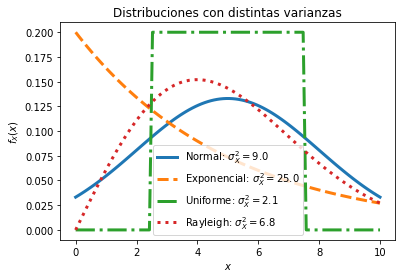

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Crear distribuciones con la misma media
N = stats.norm(5, 3)
E = stats.expon(0, 5)
U = stats.uniform(2.5, 5)
R = stats.rayleigh(0, 5*np.sqrt(2/np.pi))

distribuciones = (N, E, U, R)
nombres = ('Normal', 'Exponencial', 'Uniforme', 'Rayleigh')
x = np.linspace(0, 10, 100)

# Calcular las varianzas
varianzas = np.zeros(np.shape(distribuciones))
for i, d in enumerate(distribuciones):
    varianzas[i] = d.stats(moments='v')

# Crear las gráficas
lineas = ['-', '--', '-.', ':']
for i, d in enumerate(distribuciones):
    plt.plot(x, d.pdf(x), ls=lineas[i], lw=3,\
             label='{}: $\sigma_X^2 = {:0.1f}$'\
             .format(nombres[i], varianzas[i]))

# Información de la gráfica
plt.title('Distribuciones con distintas varianzas')
plt.xlabel('$x$')
plt.ylabel('$f_X(x)$')
plt.legend()
plt.show()

## 6.4. - Inclinación (*skewness*)

$\mu_3 = E\left[ (X - \overline{X})^3 \right]$ es una medida de la *asimetría* de $f_{X}(x)$ alrededor de su valor medio. Se le llama la inclinación (*skewness*) de la función de densidad. 

El tercer momento central normalizado $\mu_{3}/\sigma_{X}^{3}$ es conocido como el *coeficiente de inclinación* de la función de densidad,

\begin{equation}
S_X = E \left[ \left( \frac{X - m_1}{\sigma_X} \right)^3 \right]
\end{equation}

Si $S_X$ es 0, la PDF es simétrica, y si es negativo o positivo tiende a la izquierda o la derecha, respectivamente.

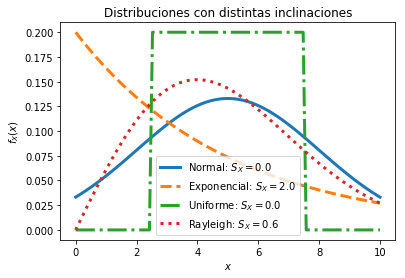

In [3]:
# Calcular las inclinaciones
inclinaciones = np.zeros(np.shape(distribuciones))
for i, d in enumerate(distribuciones):
    inclinaciones[i] = d.stats(moments='s')

# Crear las gráficas
lineas = ['-', '--', '-.', ':']
for i, d in enumerate(distribuciones):
    plt.plot(x, d.pdf(x), ls=lineas[i], lw=3,\
             label='{}: $S_X = {:0.1f}$'\
             .format(nombres[i], inclinaciones[i]))

# Información de la gráfica
plt.title('Distribuciones con distintas inclinaciones')
plt.xlabel('$x$')
plt.ylabel('$f_X(x)$')
plt.legend()
plt.show()

## 6.5 - Kurtosis

$\kappa_X$ es definido como

\begin{equation}
\kappa_X = E \left[ \left( \frac{X - m_1}{\sigma_X} \right)^4 \right] - 3
\end{equation}

y es un número adimensional descriptor del \textbf{abultamiento} de la variable aleatoria:

* si está "achatada" ($\kappa_X < 0$) (*platicúrtica*)
* o es prominente ($\kappa_X > 0$) (*leptocúrtica*).

**Nota**: La sustracción del 3 es una comparación con la distribución normal (que siempre es $\kappa_X = 3$) la cual se diría no es ni achatada ni prominente.

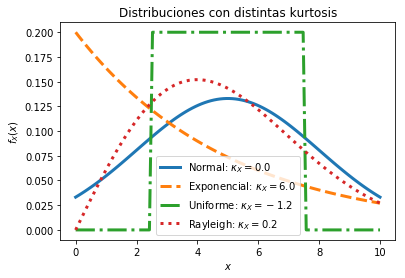

In [4]:
# Calcular las kurtosis
kurtosis = np.zeros(np.shape(distribuciones))
for i, d in enumerate(distribuciones):
    kurtosis[i] = d.stats(moments='k')

# Crear las gráficas
lineas = ['-', '--', '-.', ':']
for i, d in enumerate(distribuciones):
    plt.plot(x, d.pdf(x), ls=lineas[i], lw=3,\
             label='{}: $\kappa_X = {:0.1f}$'\
             .format(nombres[i], kurtosis[i]))

# Información de la gráfica
plt.title('Distribuciones con distintas kurtosis')
plt.xlabel('$x$')
plt.ylabel('$f_X(x)$')
plt.legend()
plt.show()

---

**Universidad de Costa Rica**

Facultad de Ingeniería

Escuela de Ingeniería Eléctrica

---